# Understanding LightCurve objects

## Learning goals

In our [TargetPixelFile tutorial](Target-Pixel-File-Tutorial.html) we learned, how to obtain data files for our objects of interest and how to examine the `metadata` stored in the headers.

In this tutorial we will learn the following,
- How to use *Lightkurve* to create a [`TESSLightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.TessLightCurve.html#lightkurve.lightcurve.TessLightCurve) object.
- How to examine the object data, and understand its format.
- What is simple aperture photometry (SAP).
- How to plot a light curve.

## What is LightCurve object?
You can create a `TESSLightCurve` object from a `TargetPixelFile` (TPF) object using Simple Aperture Photometry (SAP). 

## What is Simple Aperture Photometry (SAP)?
Aperture Photometry is the act of summing up the values of all the pixels in a pre-defined aperture as a function of time. By carefully choosing the shape of the aperture mask, you can avoid nearby contaminants or improve the strength of the specific signal you are trying to measure relative to the background.

The SAP light curve is a pixel summation time-series of all calibrated flux falling within the optimal aperture, as stored and defined in the TPF.

In this notebook we will demonstrate, let's create a `TESSLightCurve` from a `TESSTargetPixelFile`. 

## Imports
This tutorial requires that you import *Lightkurve*.

In [1]:
%matplotlib inline 
import lightkurve as lk

## Defining terms

- Target Pixel File (TPF): A file containing the original CCD pixel observations from which light curves are extracted. 

- LightCurve Object: Obtained from a TPF and contains light curve information derived using simple aperture photometry.

- Cadence: The rate at which TESS photometric observations are stored. 

- Sector: One of TESS's 27 (to date) observing periods, approximately ~27 days in duration.

- Simple Aperture Photometry (SAP):  The act of summing all pixel values in a pre-defined aperture as a function of time.

## Downloading the TPF
For this tutorial we will use the [L 98-59 System](https://arxiv.org/pdf/1903.08017.pdf) focusing on  planet c.

First we search for appropriate Target Pixel Files on [MAST](https://archive.stsci.edu/tess/) using the [`search_targetpixelfile`](https://docs.lightkurve.org/api/lightkurve.search.search_targetpixelfile.html?highlight=search_targetpixelfile) function. 

In [2]:
search = lk.search_targetpixelfile('TIC 307210830 c')
search

#,observation,author,target_name,productFilename,distance
0,TESS Sector 2,SPOC,307210830,tess2018234235059-s0002-0000000307210830-0121-s_tp.fits,0.0
1,TESS Sector 5,SPOC,307210830,tess2018319095959-s0005-0000000307210830-0125-s_tp.fits,0.0
2,TESS Sector 8,SPOC,307210830,tess2019032160000-s0008-0000000307210830-0136-s_tp.fits,0.0
3,TESS Sector 9,SPOC,307210830,tess2019058134432-s0009-0000000307210830-0139-s_tp.fits,0.0
4,TESS Sector 10,SPOC,307210830,tess2019085135100-s0010-0000000307210830-0140-s_tp.fits,0.0
5,TESS Sector 11,SPOC,307210830,tess2019112060037-s0011-0000000307210830-0143-s_tp.fits,0.0
6,TESS Sector 12,SPOC,307210830,tess2019140104343-s0012-0000000307210830-0144-s_tp.fits,0.0


Our object of interest can be found in seven sectors. Let's take the first sector, sector 2 and download that.

In [3]:
tpf = lk.search_targetpixelfile('TIC 307210830 c', sector=2).download()
tpf

TessTargetPixelFile(TICID: 307210830)

## Creating and analizing the LightCurve object

Great we now have our TPF! Lets convert this TPF into a `TessLightCurve` object using the [`to_lightcurve`](https://docs.lightkurve.org/api/lightkurve.targetpixelfile.TessTargetPixelFile.html#lightkurve.targetpixelfile.TessTargetPixelFile.to_lightcurve) function. 

To create the SAP light curve we will pass an **aperture_mask** to the `to_lightcurve` function. The default is to use the [`SPOC`](https://heasarc.gsfc.nasa.gov/docs/tess/pipeline.html) pipeline aperture, which sums all the pixels in its defined mask.

In [4]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
1354.1088231272427,21566.349609375,16.116119384765625,664.6090864691554,339.4764484490161,91191,0
1354.1102119888994,21563.88671875,16.118038177490234,664.6261723169015,339.46842003296774,91192,0
1354.112989712153,21475.162109375,16.089221954345703,664.606630403678,339.4604662968742,91194,0
1354.1143785738097,21583.30859375,16.12527084350586,664.6414481151693,339.4832617761526,91195,0
1354.1157674355243,21575.640625,16.121679306030273,664.6354584758038,339.4735678477034,91196,0
1354.1171562971804,21563.1015625,16.115528106689453,664.6334974032626,339.472138768046,91197,0
1354.1185451588947,21552.935546875,16.112627029418945,664.625177003332,339.46675685339096,91198,0
1354.1199340205515,21532.90234375,16.10567855834961,664.6301979867933,339.4699372207359,91199,0


We've built a new `TESSLightCurve` object called `lc`. Note although we used the SPOC aperture mask you can pass your own aperture, (specified by a boolean `numpy` array) as seen in the [Making Custom Apertures tutorial](Making-Custom-Apertures-Tutorial.html).

The above table displays all the light curve data. 

## Metadata

`TESSLightCurve` objects have many useful functions that you can use. As with a TPF you can access the meta data very simply.

In [5]:
lc.sector

2

Of course you still have access to time and flux attributes. In a light curve, there is only one flux point for every cadence. 

In [6]:
lc.flux, lc.time

(<Quantity [21566.35 , 21563.887, 21475.162, ..., 21250.467, 21236.355,
            21265.84 ] electron / s>,
 <Time object: scale='tdb' format='btjd' value=[1354.10882313 1354.11021199 1354.11298971 ... 1381.50982533 1381.5112142
  1381.51260307]>)

You can also check the Combined Differential Photometric Precision (CDPP) RMS per transit duration noise metric (see [Gilliland et al., 2011](https://iopscience.iop.org/article/10.1088/0067-0049/197/1/6/pdf) for more details) of the light curve using the built in method [`estimate_cdpp`](https://docs.lightkurve.org/api/lightkurve.lightcurve.FoldedLightCurve.html#lightkurve.lightcurve.FoldedLightCurve.estimate_cdpp):

In [7]:
lc.estimate_cdpp()

<Quantity 300.86105811 ppm>

The above is the Savitzky-Golay CDPP noise metric in units parts-per-million (ppm)

## Plotting the light curve

We can now use the built in `plot` function on the `TESSLightCurve` object to plot the time series. You can pass `plot` any keywords you would normally pass to [`matplotlib.pyplot.plot`](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html).

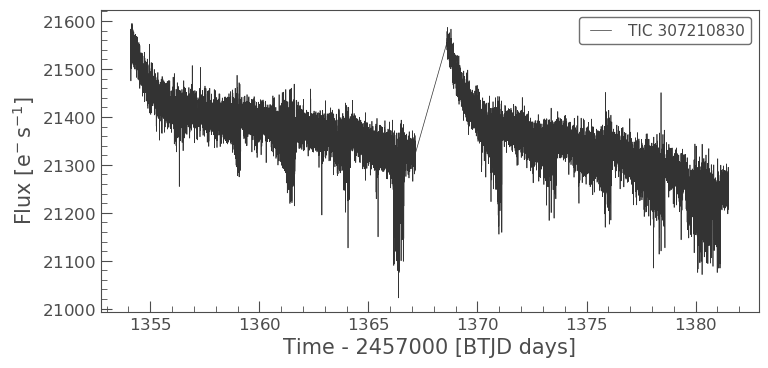

In [8]:
%matplotlib inline
lc.plot();

## Manipulating the light curve
There are a set of useful functions in [`LightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve) objects which you can use to work with the data. These include:
* [`flatten()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.flatten): Remove long term trends using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)
* [`remove_outliers()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.remove_outliers): Remove outliers using simple sigma clipping
* [`remove_nans()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.remove_nans): Remove infinite or NaN values (these can occur during thruster firings)
* [`fold()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.fold): Fold the data at a particular period
* [`bin()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.bin): Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object

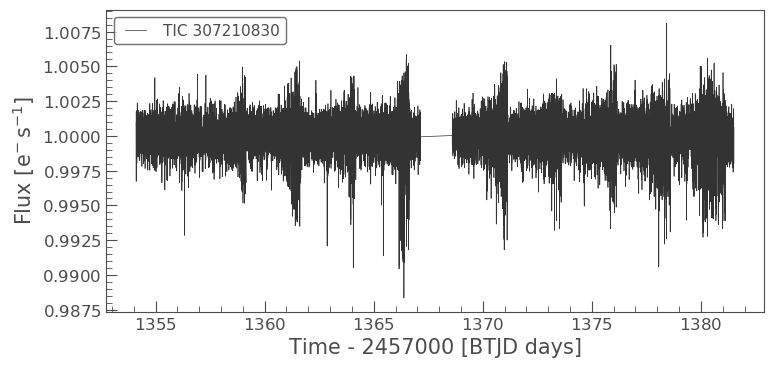

In [9]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

### Folding the light curve
From the [L 98-59 System](https://arxiv.org/pdf/1903.08017.pdf) paper we know that planet c has a time corresponding to zero phase  (noted as epoch_time) of 1367.2755 BTJD days and period of 3.690621 days. We can use the `fold()` function to find the transit in our data.

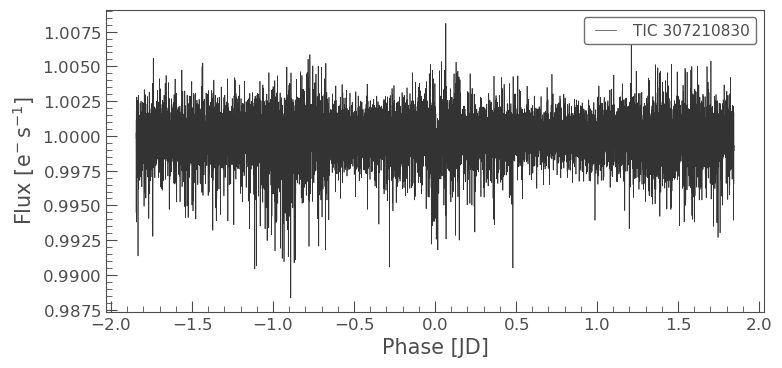

In [10]:
folded_lc = flat_lc.fold(period=3.690621,  epoch_time=1367.2755)
folded_lc.plot();

### Binning data
Often to see a trend it can be beneficial to bin the data, this can be achieved via the `bin()` function.

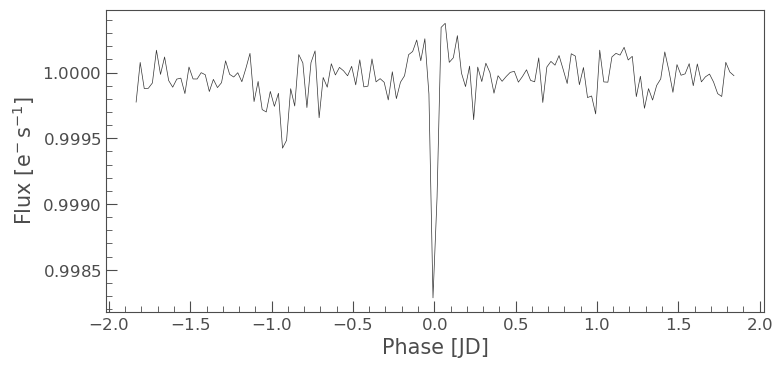

In [11]:
binned_lc = folded_lc.bin(time_bin_size=0.025)
binned_lc.plot();

We can now see our transit very clearly! Note that we can achieve the same plot from our data using one line of code instead of several, see below.

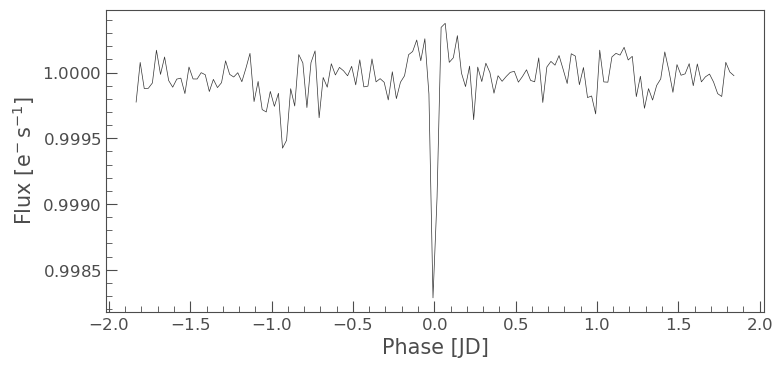

In [12]:
lc.remove_nans().flatten(window_length=401).fold(period=3.690621,  epoch_time=1367.2755).bin(time_bin_size=0.025).plot();